In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit-learn
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [4]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')


In [5]:
print(train_data.head())
print(train_data.info())
print(train_data.describe())


   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

Train test split

In [6]:
X = train_data.drop('label', axis=1)  
y = train_data['label']  


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print('The number of train data is ',X_train.shape[0])

The number of train data is  48000


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
model_lr = LogisticRegression(random_state=42, max_iter=100)
model_lr.fit(X_train, y_train)

c:\Users\srini\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [10]:
from sklearn.metrics import accuracy_score

y_pred = model_lr.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)


# Print the evaluation results
print(f'Accuracy: {accuracy}')


Accuracy: 0.8486666666666667


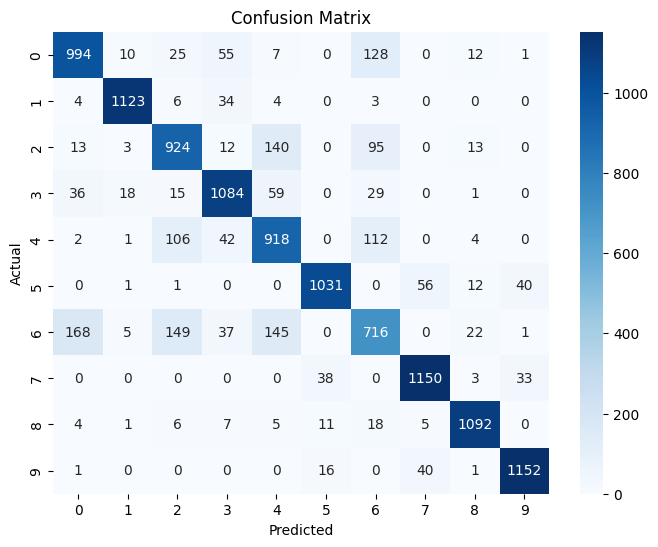

In [11]:
conf_matrix = confusion_matrix(y_val, y_pred)

# Create a color-coded confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Machine learning models 

SVM

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [13]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred = model_svm.predict(X_val)

In [16]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8848333333333334


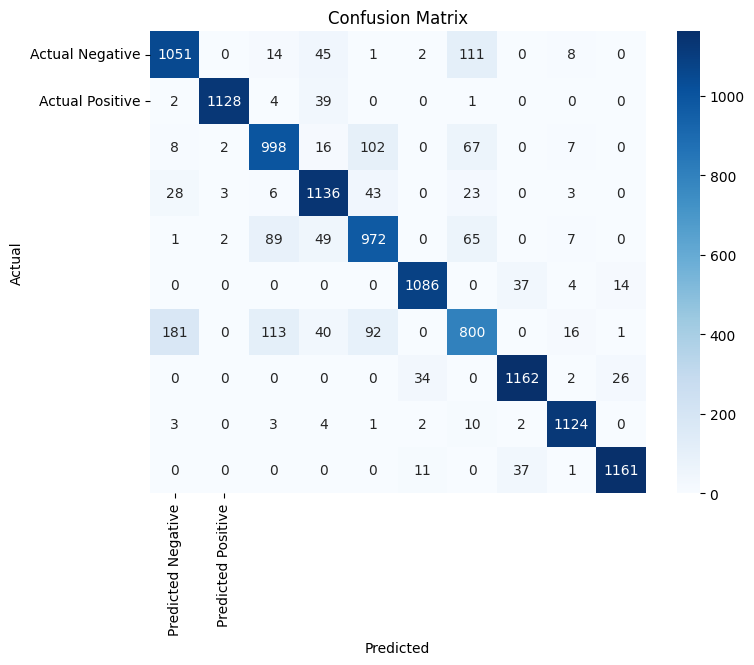

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [21]:
model_nb = GaussianNB()


In [22]:
model_nb.fit(X_train, y_train)


GaussianNB()

In [23]:
y_pred = model_nb.predict(X_val)


In [25]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.58575


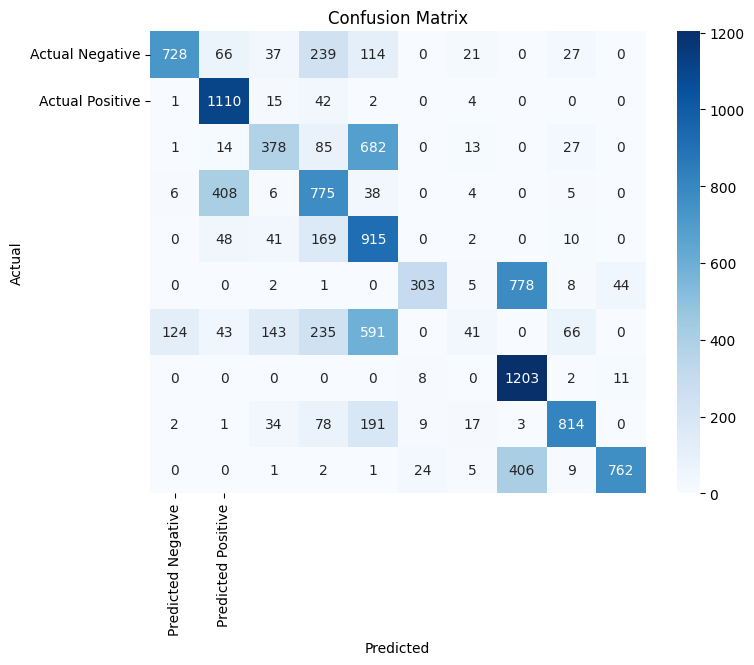

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
